In [22]:
# df

In [2]:
# Import required modules
import sys
import os

# Add src to path
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))
sys.path.append(os.path.join(os.path.dirname(os.getcwd())))


from database.sleep_queries import get_recent_sleep_data, SleepDataExtractor, get_sleep_data_by_date_range
from visualization.sleep_chart import create_sleep_chart
from visualization.sleep_utils import calculate_sleep_metrics
from database.connection import DatabaseConnection

db_connection = DatabaseConnection()

df = db_connection.query_to_dataframe('SELECT * FROM sleep_data')
df.head()


,id,user_id,date,sleep_start,sleep_end,total_sleep_minutes,deep_sleep_minutes,light_sleep_minutes,rem_sleep_minutes,wake_minutes,sleep_efficiency,naps_data,data_source,created_at,updated_at
0,2360,1,2024-09-29,2024-09-29 01:41:00-03:00,2024-09-29 05:01:00-03:00,200,24,127,49,0,100.000000,None,zepp,2025-06-04T14:19:56.464825,2025-06-04T14:19:56.464825
1,2361,1,2024-09-30,2024-09-29 21:03:00-03:00,2024-09-30 01:41:00-03:00,276,74,149,53,2,99.280576,"[{\start\"":\""2022-01-08 00:36:08+0000\""",zepp,2025-06-04T14:19:56.464826,2025-06-04T14:19:56.464827
2,2362,1,2024-10-01,2024-09-30 22:56:00-03:00,2024-10-01 04:57:00-03:00,361,76,242,43,0,100.000000,None,zepp,2025-06-04T14:19:56.464827,2025-06-04T14:19:56.464828
3,2363,1,2024-10-02,2024-10-01 22:22:00-03:00,2024-10-02 06:09:00-03:00,288,99,159,30,179,61.670236,"[{\start\"":\""2022-01-08 00:37:45+0000\""",zepp,2025-06-04T14:19:56.464828,2025-06-04T14:19:56.464829
4,2364,1,2024-10-03,2024-10-02 22:51:00-03:00,2024-10-03 01:43:00-03:00,142,35,101,6,30,82.558140,None,zepp,2025-06-04T14:19:56.464830,2025-06-04T14:19:56.464830


In [6]:
df.sort_values('date').tail(10)

,id,user_id,date,sleep_start,sleep_end,total_sleep_minutes,deep_sleep_minutes,light_sleep_minutes,rem_sleep_minutes,wake_minutes,sleep_efficiency,naps_data,data_source,created_at,updated_at,total_sleep_hours,bedtime_minutes,waketime_minutes,week_tuesday
239,2599,1,2025-05-26,2025-05-25 21:55:00-03:00,2025-05-26 07:21:00-03:00,566,66,416,84,0,100.000000,None,zepp,2025-06-04T14:19:56.465124,2025-06-04T14:19:56.465125,9.433333,1315,441,2025-05-20
240,2600,1,2025-05-27,2025-05-26 21:32:00-03:00,2025-05-27 07:51:00-03:00,603,69,398,136,16,97.415186,"[{\start\"":\""2024-10-04 00:37:36+0000\""",zepp,2025-06-04T14:19:56.465125,2025-06-04T14:19:56.465126,10.316667,1292,471,2025-05-27
241,2601,1,2025-05-28,2025-05-27 21:17:00-03:00,2025-05-28 06:39:00-03:00,554,67,373,114,8,98.576512,None,zepp,2025-06-04T14:19:56.465127,2025-06-04T14:19:56.465127,9.366667,1277,399,2025-05-27
242,2602,1,2025-05-29,2025-05-28 22:39:00-03:00,2025-05-29 07:47:00-03:00,532,66,376,90,16,97.080292,None,zepp,2025-06-04T14:19:56.465128,2025-06-04T14:19:56.465129,9.133333,1359,467,2025-05-27
243,2603,1,2025-05-30,2025-05-29 21:31:00-03:00,2025-05-30 09:04:00-03:00,691,115,483,93,2,99.711400,None,zepp,2025-06-04T14:19:56.465129,2025-06-04T14:19:56.465130,11.550000,1291,544,2025-05-27
244,2604,1,2025-05-31,2025-05-30 22:17:00-03:00,2025-05-31 08:32:00-03:00,614,93,393,128,1,99.837398,None,zepp,2025-06-04T14:19:56.465130,2025-06-04T14:19:56.465131,10.250000,1337,512,2025-05-27
245,2605,1,2025-06-01,2025-05-31 22:18:00-03:00,2025-06-01 08:24:00-03:00,597,101,394,102,9,98.514851,None,zepp,2025-06-04T14:19:56.465132,2025-06-04T14:19:56.465132,10.100000,1338,504,2025-05-27
246,2606,1,2025-06-02,2025-06-02 00:06:00-03:00,2025-06-02 07:01:00-03:00,415,55,277,83,0,100.000000,None,zepp,2025-06-04T14:19:56.465133,2025-06-04T14:19:56.465133,6.916667,6,421,2025-05-27
247,2607,1,2025-06-03,2025-06-02 21:49:00-03:00,2025-06-03 08:04:00-03:00,615,85,400,130,0,100.000000,None,zepp,2025-06-04T14:19:56.465134,2025-06-04T14:19:56.465135,10.250000,1309,484,2025-06-03
248,2608,1,2025-06-04,2025-06-03 22:10:00-03:00,2025-06-04 07:05:00-03:00,535,89,357,89,0,100.000000,None,zepp,2025-06-04T14:19:56.465135,2025-06-04T14:19:56.465136,8.916667,1330,425,2025-06-03


In [30]:
import pandas as pd
from datetime import datetime, timedelta

# Convert the dataframe to have proper datetime columns
df['sleep_start'] = pd.to_datetime(df['sleep_start'])
df['sleep_end'] = pd.to_datetime(df['sleep_end'])
df['date'] = pd.to_datetime(df['date'])

# Calculate total sleep duration in hours
df['total_sleep_hours'] = (df['sleep_end'] - df['sleep_start']).dt.total_seconds() / 3600

# Extract time components for averaging - handle midnight crossover properly
def get_bedtime_minutes(sleep_start, sleep_date):
    """Convert bedtime to minutes, handling midnight crossover."""
    # If sleep starts after midnight (early morning hours like 00:30),
    # treat it as late night of the previous day for averaging purposes
    if sleep_start.hour < 12:  # Early morning hours (00:00 - 11:59)
        # Add 24 hours worth of minutes to represent late night
        return (sleep_start.hour + 24) * 60 + sleep_start.minute
    else:
        return sleep_start.hour * 60 + sleep_start.minute

df['bedtime_minutes'] = df.apply(lambda row: get_bedtime_minutes(row['sleep_start'], row['date']), axis=1)
df['waketime_minutes'] = df['sleep_end'].dt.hour * 60 + df['sleep_end'].dt.minute

# Create a function to get the Tuesday of each week
def get_tuesday_of_week(date):
    """Get the Tuesday of the week for a given date."""
    days_since_tuesday = (date.weekday() - 1) % 7
    tuesday = date - timedelta(days=days_since_tuesday)
    return tuesday

# Add Tuesday column for grouping
df['week_tuesday'] = df['date'].apply(get_tuesday_of_week)

# Group by Tuesday and calculate weekly averages and standard deviations
weekly_averages = df.groupby('week_tuesday').agg({
    'bedtime_minutes': ['mean', 'std'],
    'waketime_minutes': ['mean', 'std'],
    'total_sleep_hours': ['mean', 'std']
}).reset_index()

# Flatten column names
weekly_averages.columns = ['week_tuesday', 'bedtime_minutes_mean', 'bedtime_minutes_std',
                          'waketime_minutes_mean', 'waketime_minutes_std',
                          'total_sleep_hours_mean', 'total_sleep_hours_std']

# Convert minutes back to time format for display
def minutes_to_time(minutes):
    """Convert minutes to time format, handling values > 24 hours."""
    # Handle bedtimes that went past midnight
    if minutes >= 24 * 60:
        minutes = minutes - 24 * 60
    hours = int(minutes // 60)
    mins = int(minutes % 60)
    return f"{hours:02d}:{mins:02d}"

weekly_averages['avg_bedtime'] = weekly_averages['bedtime_minutes_mean'].apply(minutes_to_time)
weekly_averages['avg_waketime'] = weekly_averages['waketime_minutes_mean'].apply(minutes_to_time)
weekly_averages['avg_sleep_hours'] = weekly_averages['total_sleep_hours_mean'].round(2)

# Add standard deviation columns
weekly_averages['bedtime_std_hours'] = (weekly_averages['bedtime_minutes_std'] / 60).round(2)
weekly_averages['waketime_std_hours'] = (weekly_averages['waketime_minutes_std'] / 60).round(2)
weekly_averages['sleep_hours_std'] = weekly_averages['total_sleep_hours_std'].round(2)

weekly_averages[['week_tuesday', 'avg_bedtime', 'avg_waketime', 'avg_sleep_hours',
                'bedtime_std_hours', 'waketime_std_hours', 'sleep_hours_std']].tail(22) # .to_csv('~/Downloads/sleep_data.csv')

,week_tuesday,avg_bedtime,avg_waketime,avg_sleep_hours,bedtime_std_hours,waketime_std_hours,sleep_hours_std
91,2025-01-07,23:18,05:29,6.19,2.19,1.11,2.10
92,2025-01-14,23:58,04:21,4.38,1.97,1.50,1.08
93,2025-01-21,22:14,05:04,6.83,1.06,0.63,1.20
94,2025-01-28,22:09,03:41,5.52,1.52,1.79,3.10
95,2025-02-04,22:14,05:14,7.00,1.91,1.38,2.44
96,2025-02-11,23:08,05:30,6.36,1.34,0.90,1.61
97,2025-02-18,22:46,03:06,4.33,1.02,2.56,3.36
98,2025-02-25,22:16,05:48,7.54,1.73,0.71,2.20
99,2025-03-04,22:43,05:58,7.24,1.09,1.37,1.68
100,2025-03-11,22:05,06:41,8.60,0.30,1.26,1.49


In [33]:
steps = db_connection.query_to_dataframe('SELECT * FROM daily_activity')

# Convert date column to datetime
steps['date'] = pd.to_datetime(steps['date'])

# Add Tuesday column for grouping (same function as used for sleep data)
steps['week_tuesday'] = steps['date'].apply(get_tuesday_of_week)

# Group by Tuesday and calculate weekly totals and averages
weekly_steps = steps.groupby('week_tuesday').agg({
    'steps': ['sum', 'mean'],
    'calories': ['sum', 'mean'],
    'distance': ['sum', 'mean'],
    'run_distance': ['sum', 'mean'],
    'active_minutes': ['sum', 'mean']
}).reset_index()

# Flatten column names
weekly_steps.columns = ['week_tuesday', 'total_steps', 'avg_daily_steps',
                       'total_calories', 'avg_daily_calories',
                       'total_distance', 'avg_daily_distance',
                       'total_run_distance', 'avg_daily_run_distance',
                       'total_active_minutes', 'avg_daily_active_minutes']

# Round the averages
weekly_steps['avg_daily_steps'] = weekly_steps['avg_daily_steps'].round(0).astype(int)
weekly_steps['avg_daily_calories'] = weekly_steps['avg_daily_calories'].round(1)
weekly_steps['avg_daily_distance'] = weekly_steps['avg_daily_distance'].round(1)
weekly_steps['avg_daily_run_distance'] = weekly_steps['avg_daily_run_distance'].round(1)
weekly_steps['avg_daily_active_minutes'] = weekly_steps['avg_daily_active_minutes'].round(1)

weekly_steps.tail(10)

,week_tuesday,total_steps,avg_daily_steps,total_calories,avg_daily_calories,total_distance,avg_daily_distance,total_run_distance,avg_daily_run_distance,total_active_minutes,avg_daily_active_minutes
103,2025-04-01,31449,4493,1467.0,209.6,24684.0,3526.3,19557.0,2793.9,0,0.0
104,2025-04-08,43690,6241,2455.0,350.7,35784.0,5112.0,27458.0,3922.6,0,0.0
105,2025-04-15,44847,6407,3658.0,522.6,35982.0,5140.3,27594.0,3942.0,0,0.0
106,2025-04-22,50872,7267,3288.0,469.7,40502.0,5786.0,31238.0,4462.6,0,0.0
107,2025-04-29,56040,8006,4291.0,613.0,43671.0,6238.7,33273.0,4753.3,0,0.0
108,2025-05-06,34477,4925,3739.0,534.1,28425.0,4060.7,21750.0,3107.1,0,0.0
109,2025-05-13,20269,2896,1734.0,247.7,15700.0,2242.9,12552.0,1793.1,0,0.0
110,2025-05-20,19611,2802,905.0,129.3,15321.0,2188.7,12157.0,1736.7,0,0.0
111,2025-05-27,13986,1998,701.0,100.1,11116.0,1588.0,8914.0,1273.4,0,0.0
112,2025-06-03,4579,2290,232.0,116.0,3916.0,1958.0,3125.0,1562.5,0,0.0


In [ ]:
merge = weekly_averages.merge(weekly_steps[['week_tuesday', 'avg_daily_steps']], on='week_tuesday', how='left')

merge[['week_tuesday',  'avg_daily_steps', 'avg_bedtime', 'avg_waketime', 'avg_sleep_hours',
                'bedtime_std_hours', 'waketime_std_hours', 'sleep_hours_std']].tail(22).to_csv('~/Downloads/sleep_data.csv')

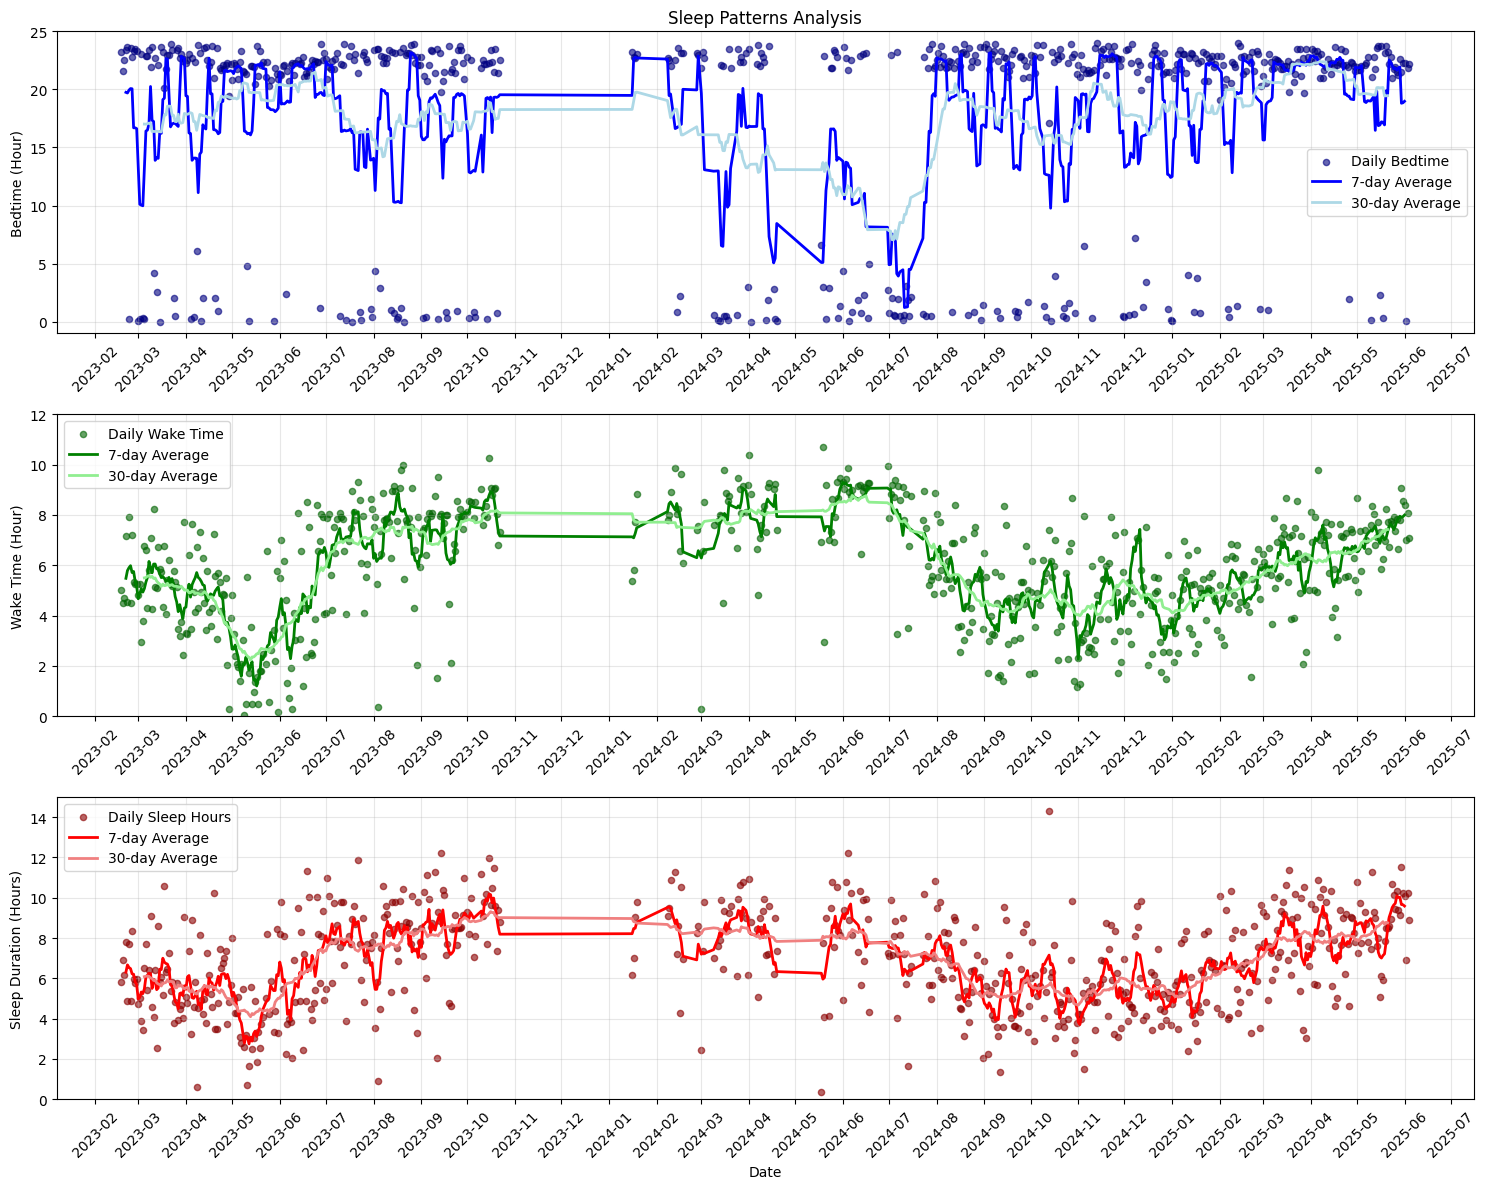

Sleep Pattern Summary:
Average bedtime: 17.71 hours (23:03)
Average wake time: 5.88 hours (05:52)
Average sleep duration: 6.83 hours
Sleep duration std dev: 2.40 hours


In [23]:
# Create comprehensive sleep analysis plots
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import numpy as np

# Prepare data for plotting
df_plot = df.copy()

# Remove rows where sleep hours are 0
df_plot = df_plot[df_plot['total_sleep_hours'] > 0]

df_plot['bedtime_hour'] = df_plot['bedtime_minutes'] / 60
df_plot['waketime_hour'] = df_plot['waketime_minutes'] / 60

# Handle bedtime hours > 24 (past midnight)
df_plot['bedtime_hour'] = df_plot['bedtime_hour'].apply(lambda x: x - 24 if x >= 24 else x)

# Sort by date for proper plotting
df_plot = df_plot.sort_values('date')

# Calculate rolling averages
df_plot['bedtime_7day_avg'] = df_plot['bedtime_hour'].rolling(window=7, center=True).mean()
df_plot['waketime_7day_avg'] = df_plot['waketime_hour'].rolling(window=7, center=True).mean()
df_plot['sleep_7day_avg'] = df_plot['total_sleep_hours'].rolling(window=7, center=True).mean()

df_plot['bedtime_30day_avg'] = df_plot['bedtime_hour'].rolling(window=30, center=True).mean()
df_plot['waketime_30day_avg'] = df_plot['waketime_hour'].rolling(window=30, center=True).mean()
df_plot['sleep_30day_avg'] = df_plot['total_sleep_hours'].rolling(window=30, center=True).mean()

# Create the plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))

# Plot 1: Bedtime
ax1.scatter(df_plot['date'], df_plot['bedtime_hour'], alpha=0.6, s=20, color='navy', label='Daily Bedtime')
ax1.plot(df_plot['date'], df_plot['bedtime_7day_avg'], color='blue', linewidth=2, label='7-day Average')
ax1.plot(df_plot['date'], df_plot['bedtime_30day_avg'], color='lightblue', linewidth=2, label='30-day Average')
ax1.set_ylabel('Bedtime (Hour)')
ax1.set_title('Sleep Patterns Analysis')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-1, 25)

# Plot 2: Wake time
ax2.scatter(df_plot['date'], df_plot['waketime_hour'], alpha=0.6, s=20, color='darkgreen', label='Daily Wake Time')
ax2.plot(df_plot['date'], df_plot['waketime_7day_avg'], color='green', linewidth=2, label='7-day Average')
ax2.plot(df_plot['date'], df_plot['waketime_30day_avg'], color='lightgreen', linewidth=2, label='30-day Average')
ax2.set_ylabel('Wake Time (Hour)')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 12)

# Plot 3: Sleep duration
ax3.scatter(df_plot['date'], df_plot['total_sleep_hours'], alpha=0.6, s=20, color='darkred', label='Daily Sleep Hours')
ax3.plot(df_plot['date'], df_plot['sleep_7day_avg'], color='red', linewidth=2, label='7-day Average')
ax3.plot(df_plot['date'], df_plot['sleep_30day_avg'], color='lightcoral', linewidth=2, label='30-day Average')
ax3.set_ylabel('Sleep Duration (Hours)')
ax3.set_xlabel('Date')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, 15)

# Format x-axis for all subplots
for ax in [ax1, ax2, ax3]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("Sleep Pattern Summary:")
print("=" * 50)
print(f"Average bedtime: {df_plot['bedtime_hour'].mean():.2f} hours ({minutes_to_time(df_plot['bedtime_minutes'].mean())})")
print(f"Average wake time: {df_plot['waketime_hour'].mean():.2f} hours ({minutes_to_time(df_plot['waketime_minutes'].mean())})")
print(f"Average sleep duration: {df_plot['total_sleep_hours'].mean():.2f} hours")
print(f"Sleep duration std dev: {df_plot['total_sleep_hours'].std():.2f} hours")

In [15]:
import pandas as pd
sleep_data = get_sleep_data_by_date_range(start_date="2025-05-10", end_date="2025-05-20")
pd.DataFrame(sleep_data)

,day,bedtime,wake_time,full_date
0,05/10,00:09,07:35,2025-05-10
1,05/11,21:06,08:22,2025-05-11
2,05/12,22:46,08:03,2025-05-12
3,05/13,21:47,06:47,2025-05-13
4,05/14,23:32,07:08,2025-05-14
5,05/15,23:43,07:44,2025-05-15
6,05/16,02:16,07:20,2025-05-16
7,05/17,23:45,05:52,2025-05-17
8,05/18,00:21,06:15,2025-05-18
9,05/19,23:08,06:58,2025-05-19


In [8]:
# Load recent sleep data from database
sleep_data = get_sleep_data_by_date_range(start_date="2025-05-10", end_date="2025-05-20")
# sleep_data = get_recent_sleep_data(days=21)
print(f"Found {len(sleep_data)} days of sleep data:")
for data in sleep_data:
    print(f"  {data['day']}: {data['bedtime']} - {data['wake_time']}")

# Show full dates too
print("\nFull dates:")
for data in sleep_data:
    print(f"  {data['full_date']}: {data['bedtime']} - {data['wake_time']}")


Found 11 days of sleep data:
  05/10: 00:09 - 07:35
  05/11: 21:06 - 08:22
  05/12: 22:46 - 08:03
  05/13: 21:47 - 06:47
  05/14: 23:32 - 07:08
  05/15: 23:43 - 07:44
  05/16: 02:16 - 07:20
  05/17: 23:45 - 05:52
  05/18: 00:21 - 06:15
  05/19: 23:08 - 06:58
  05/20: 23:43 - 08:13

Full dates:
  2025-05-10: 00:09 - 07:35
  2025-05-11: 21:06 - 08:22
  2025-05-12: 22:46 - 08:03
  2025-05-13: 21:47 - 06:47
  2025-05-14: 23:32 - 07:08
  2025-05-15: 23:43 - 07:44
  2025-05-16: 02:16 - 07:20
  2025-05-17: 23:45 - 05:52
  2025-05-18: 00:21 - 06:15
  2025-05-19: 23:08 - 06:58
  2025-05-20: 23:43 - 08:13


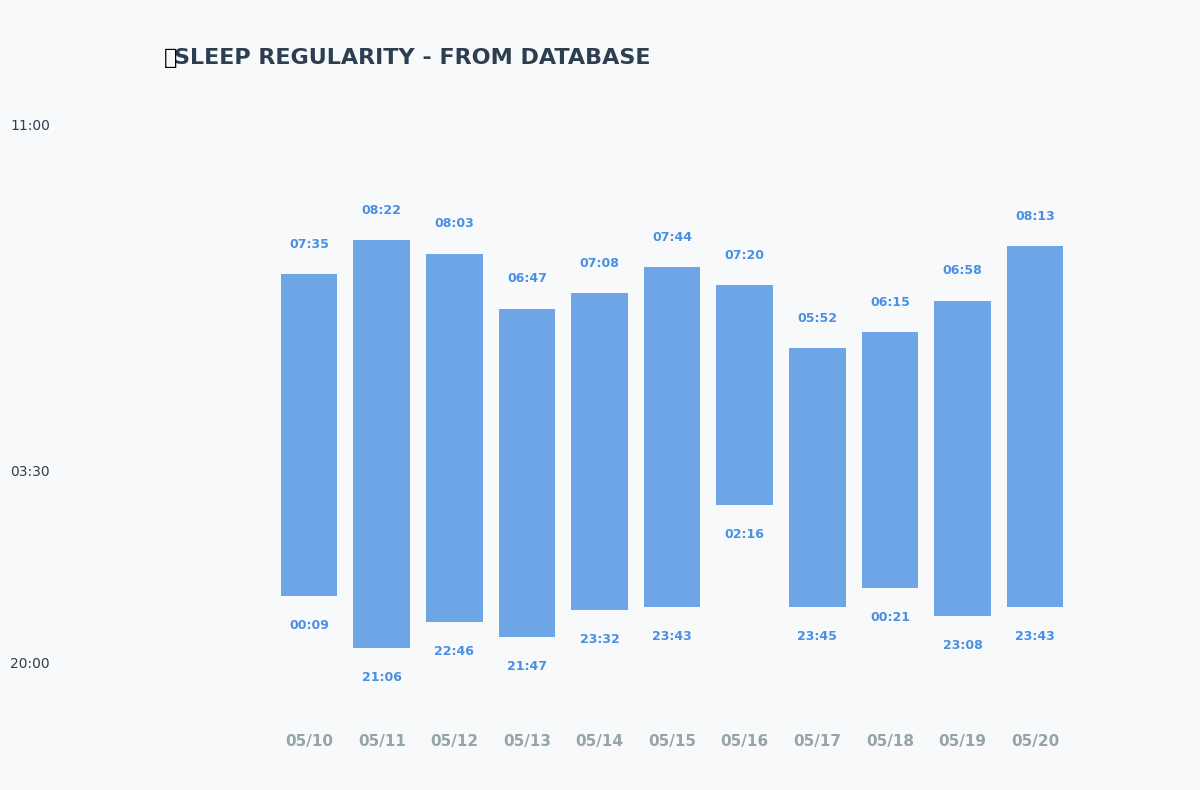

Sleep Metrics:
  Average Duration: 7.8 hours
  Sleep Consistency: 42.0%
  Average Bedtime: 16.9 hours
  Average Wake Time: 7.3 hours


In [9]:
# Create sleep chart with real dates
chart = create_sleep_chart(
    sleep_data=sleep_data,
    title="SLEEP REGULARITY - FROM DATABASE",
    figsize=(12, 8)
)

# Display the chart
chart.show()

# Calculate and show sleep metrics
metrics = calculate_sleep_metrics(sleep_data)
print("Sleep Metrics:")
print(f"  Average Duration: {metrics['avg_duration']:.1f} hours")
print(f"  Sleep Consistency: {metrics['sleep_consistency']:.1f}%")
print(f"  Average Bedtime: {metrics['avg_bedtime']:.1f} hours")
print(f"  Average Wake Time: {metrics['avg_wake_time']:.1f} hours")
